# IMPORTS

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


## Etapa 4

Nesta secção será 

In [5]:
# path="C:\\Users\\guilh\\OneDrive - Universidade de Aveiro\\Guilherme\\dataset.csv"
# data=pd.read_csv(path)
data=pd.read_csv('dataset.csv')


In [6]:
X = data.drop('Y', axis=1)
y = data['Y']

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# Função para criar o modelo da rede neural
def create_model(neurons=1, optimizer='adam', layer_type='rectangular', dropout_rate=0.0, num_layers=2):
    model = Sequential()

    if layer_type == 'rectangular':
        for _ in range(num_layers):
            model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
            # Adicionar dropout se o dropout_rate for maior que 0
            if dropout_rate > 0:
                model.add(Dropout(dropout_rate))
    elif layer_type == 'conic':
        for _ in range(num_layers):
            model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
            if dropout_rate > 0:
                model.add(Dropout(dropout_rate))
            neurons=neurons //2

    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Criar o modelo KerasRegressor
model = KerasRegressor(build_fn=create_model, epochs=25, batch_size=32, verbose=1)

# Definir os hiperparâmetros a serem testados
parameters = {
    'neurons': [128, 256, 512],
    'optimizer': ['adam'],
    'layer_type': ['rectangular', 'conic'],
    'dropout_rate': [0.0, 0.2, 0.5],
    'num_layers': [2, 3],  # Adicionado para escolher entre 2 ou 3 camadas
    'callbacks': [[EarlyStopping(monitor='val_loss', patience=3)]]
}

# Criar objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)

# Treinar o modelo usando a busca em grade
grid_result = grid_search.fit(X_train, y_train, validation_data=(X_val, y_val))

# Exibir os melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros:", grid_result.best_params_)

# Avaliar o modelo no conjunto de teste
test_score = grid_result.score(X_test, y_test)
print(f"Desempenho no Conjunto de Teste: {test_score:.4f}")



In [10]:
# Splitting data into training, testing and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Convolutional Neural Network (CNN)

In [16]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)[1]
print("Mean Squared Error on Test Set:", mse)

Epoch 1/10
368/497 [=====================>........] - ETA: 43s - loss: 465.4660 - mean_squared_error: 465.4660

### Dense Neural Network

In [11]:
print(X_train.shape)

(13906, 8774)


#### Modelo com 3 camadas

In [12]:
# Defina a arquitetura da DNN para regressão (poucas camadas)
model_few_layers = Sequential()
model_few_layers.add(Dense(128, activation='relu', input_shape=(8774,)))
model_few_layers.add(Dropout(0.5))
model_few_layers.add(Dense(64, activation='relu'))
model_few_layers.add(Dropout(0.5))
model_few_layers.add(Dense(1, activation='linear'))  # Camada de saída para regressão

# Compile o modelo
model_few_layers.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Imprimir informações do modelo
model_few_layers.summary()

# Treinar o modelo com poucas camadas
history_few_layers = model_few_layers.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1123200   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1131521 (4.32 MB)
Trainable params: 1131521 (4.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
435/435 [==============================] - 7s 12ms/step - loss: 481.1953 - mean_absolute_error: 14.4577 - val_loss: 416.5554 - val_mean_absolute_error: 12.7844
Epoch 2/10
435/435 [==============================] - 4s 10ms/step - loss: 421.6872 - mean_absolute_error: 13.3790 - val_loss: 385.6452 - val_mean_absolute_error: 12.1948
Epoch 3/10
435/435 [==============================] - 4s 10ms/step - loss: 404.4470 - mean_absolute_error: 13.0635 - val_loss: 395.5566 - val_mean_absolute_error: 12.3707
Epoch 4/10
435/435 [==============================] - 5s 11ms/step - loss: 385.8983 - mean_absolute_error: 12.7519 - val_loss: 371.6116 - val_mean_absolute_error: 12.0421
Epoch 5/10
435/435 [==============================] - 5s 11ms/step - loss: 385.8829 - mean_absolute_error: 12.7397 - val_loss: 386.1222 - val_mean_absolute_error: 12.3230
Epoch 6/10
435/435 [==============================] - 5s 10ms/step - loss: 367.3031 - mean_absolute_error: 12.4566 - val_loss: 360.5284 - val_mea

In [13]:
# Faça previsões usando o modelo DNN treinado
y_test_pred = model_few_layers.predict(X_test)

# Agora, y_test_pred contém as previsões para o conjunto de teste

# Avalie o desempenho do modelo, se necessário

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Mean Squared Error (Test): {mse_test:.2f}")
print(f"Mean Absolute Error (Test): {mae_test:.2f}")

94/94 [==============================] - 0s 3ms/step
Mean Squared Error (Test): 298.01
Mean Absolute Error (Test): 11.44


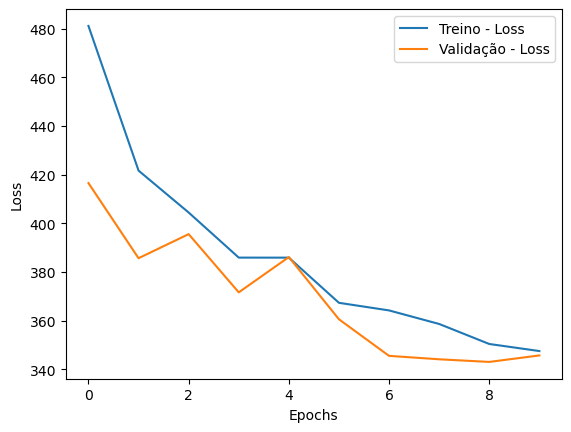

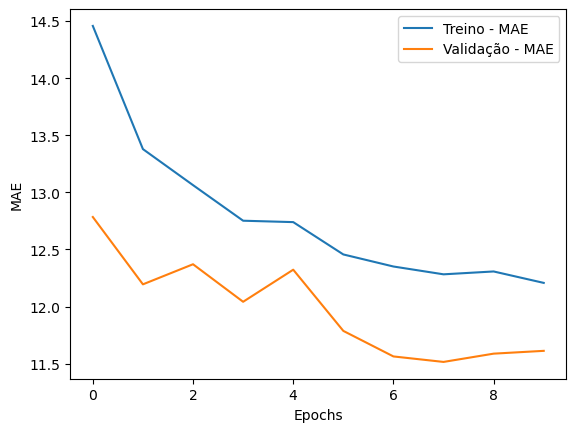

In [19]:
train_loss_few_layers = history_few_layers.history['loss']
val_loss_few_layers = history_few_layers.history['val_loss']
train_mae_few_layers = history_few_layers.history['mean_absolute_error']
val_mae_few_layers = history_few_layers.history['val_mean_absolute_error']

# Plotar as métricas de perda
plt.plot(train_loss_few_layers, label='Treino - Loss')
plt.plot(val_loss_few_layers, label='Validação - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotar as métricas de MAE
plt.plot(train_mae_few_layers, label='Treino - MAE')
plt.plot(val_mae_few_layers, label='Validação - MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

Um gráfico de loss decrescente é positivo, indicando que o modelo está a melhorar na minimização do erro durante o treino.

Um gráfico de MAE decrescente indica que o modelo está a melhorar ao longo do treino, representando a média das diferenças absolutas entre as previsões e os valores reais; quando o MAE na validação é consistentemente inferior ao treino, sugere uma boa capacidade de generalização para dados não vistos.

#### Modelo com 5 camadas (DNN)

In [15]:
# Defina a arquitetura da DNN para regressão (cinco camadas)
model_five_layers = Sequential()
model_five_layers.add(Dense(256, activation='relu', input_shape=(8774,)))
model_five_layers.add(Dropout(0.5))
model_five_layers.add(Dense(128, activation='relu'))
model_five_layers.add(Dropout(0.5))
model_five_layers.add(Dense(64, activation='relu'))
model_five_layers.add(Dropout(0.5))
model_five_layers.add(Dense(32, activation='relu'))
model_five_layers.add(Dropout(0.5))
model_five_layers.add(Dense(1, activation='linear'))  # Camada de saída para regressão

# Compile o modelo
model_five_layers.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Imprimir informações do modelo
model_five_layers.summary()

# Treinar o modelo com cinco camadas
history_five_layers = model_five_layers.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               2246400   
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)               

In [16]:
y_test_pred = model_five_layers.predict(X_test)

# Agora, y_test_pred contém as previsões para o conjunto de teste

# Avalie o desempenho do modelo, se necessário
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Mean Squared Error (Test): {mse_test:.2f}")
print(f"Mean Absolute Error (Test): {mae_test:.2f}")

94/94 [==============================] - 0s 4ms/step
Mean Squared Error (Test): 352.37
Mean Absolute Error (Test): 12.41


In [17]:
# Acessar as métricas de treinamento e validação do modelo com cinco camadas
train_loss_five_layers = history_five_layers.history['loss']
val_loss_five_layers = history_five_layers.history['val_loss']
train_mae_five_layers = history_five_layers.history['mean_absolute_error']
val_mae_five_layers = history_five_layers.history['val_mean_absolute_error']

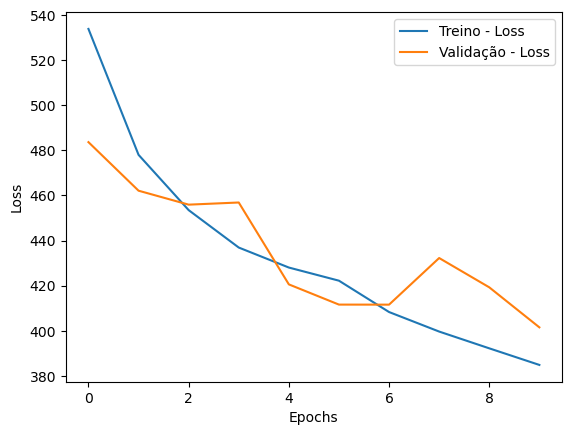

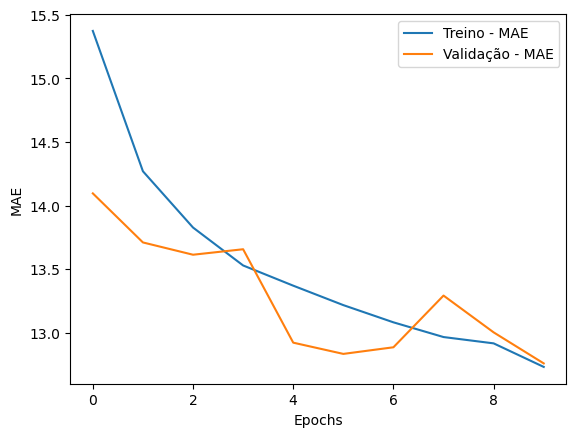

In [18]:
# Plotar as métricas de perda
plt.plot(train_loss_five_layers, label='Treino - Loss')
plt.plot(val_loss_five_layers, label='Validação - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotar as métricas de MAE
plt.plot(train_mae_five_layers, label='Treino - MAE')
plt.plot(val_mae_five_layers, label='Validação - MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


Aqui verificamos que curva de validação é geralmente descendente, mas apresenta picos ocasionais, pode ser um sinal de que o modelo está se ajustando bem à maioria dos padrões do conjunto de treino, mas encontra dificuldades em alguns casos específicos do conjunto de validação. Esses picos podem representar situações em que o modelo não está generalizando tão bem.